In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import pathlib
# Download and extract the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 3s 0us/step


In [ ]:
print(data_dir)


/root/.keras/datasets/flower_photos


In [ ]:
# Set image dimensions and batch size for training
img_height, img_width = 180, 180
batch_size=32

# Create training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


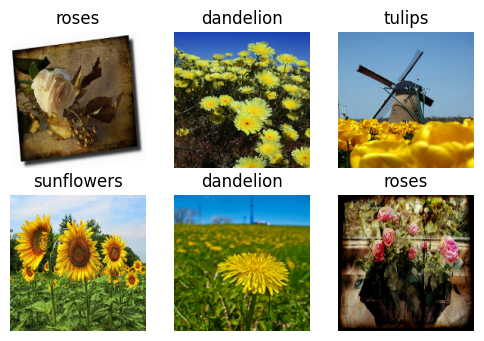

In [ ]:
import matplotlib.pyplot as plt

# Display sample images from the training dataset
plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [ ]:
# Build the model
resnet_model = Sequential()

# Load the pretrained Resnet50 model
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    classes=5,
    weights='imagenet'
)

# Set the last 2 layers of the pretrained model as trainable
for layer in pretrained_model.layers[-2:]:
    layer.trainable = True

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 24586245 (93.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
epochs=10

# Train the model
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 69s 319ms/step - loss: 0.4879 - accuracy: 0.8239 - val_loss: 0.4382 - val_accuracy: 0.8801
Epoch 2/10
92/92 [==============================] - 25s 264ms/step - loss: 0.0903 - accuracy: 0.9731 - val_loss: 0.2690 - val_accuracy: 0.9087
Epoch 3/10
92/92 [==============================] - 25s 267ms/step - loss: 0.0235 - accuracy: 0.9939 - val_loss: 0.2193 - val_accuracy: 0.9332
Epoch 4/10
92/92 [==============================] - 24s 260ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.3498 - val_accuracy: 0.9074
Epoch 5/10
92/92 [==============================] - 24s 258ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.2576 - val_accuracy: 0.9237
Epoch 6/10
92/92 [==============================] - 24s 262ms/step - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.2828 - val_accuracy: 0.9237
Epoch 7/10
92/92 [==============================] - 24s 259ms/step - loss: 0.0481 - accuracy: 0.9843 - val_loss: 0.3319 - val_accuracy: 0.9019

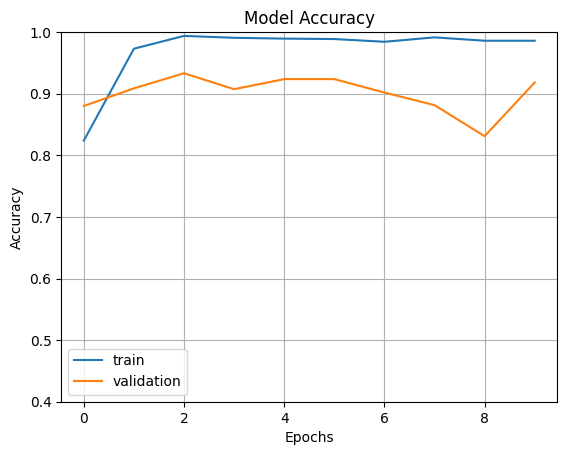

In [ ]:
# Plot the training and validation accuracy over epochs
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

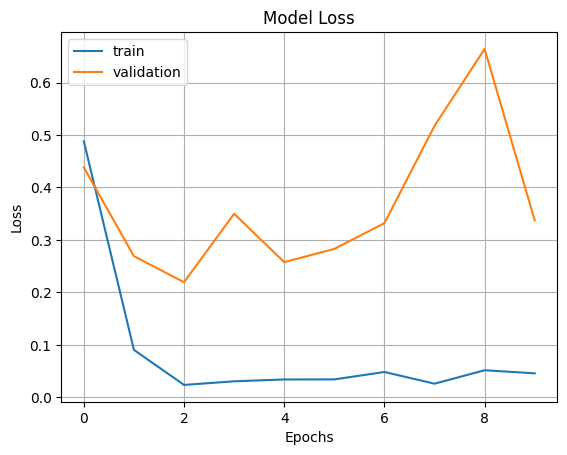

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Load sample images for prediction
import cv2
image1=cv2.imread('/content/rose1.jpg')
image2=cv2.imread('/content/rose2.jpg')
image3=cv2.imread('/content/rose3.jpg')
image4=cv2.imread('/content/rose4.jpg')
image5=cv2.imread('/content/rose5.jpg')
image6=cv2.imread('/content/daisy1.jpg')
image7=cv2.imread('/content/daisy2.jpg')
image8=cv2.imread('/content/daisy3.jpg')
image9=cv2.imread('/content/daisy4.jpg')
image10=cv2.imread('/content/daisy5.jpg')
image11=cv2.imread('/content/dandelion1.jpg')
image12=cv2.imread('/content/dandelion2.jpg')
image13=cv2.imread('/content/dandelion3.jpg')
image14=cv2.imread('/content/dandelion4.jpg')
image15=cv2.imread('/content/dandelion5.jpg')
image16=cv2.imread('/content/sunflower1.jpg')
image17=cv2.imread('/content/sunflower2.jpg')
image18=cv2.imread('/content/sunflower3.jpg')
image19=cv2.imread('/content/sunflower4.jpg')
image20=cv2.imread('/content/sunflower5.jpg')
image21=cv2.imread('/content/tulip1.jpg')
image22=cv2.imread('/content/tulip2.jpg')
image23=cv2.imread('/content/tulip3.jpg')
image24=cv2.imread('/content/tulip4.jpg')
image25=cv2.imread('/content/tulip5.jpg')


In [ ]:
image_resized1= cv2.resize(image1, (img_height,img_width))
image1=np.expand_dims(image_resized1,axis=0)
print(image1.shape)

image_resized2= cv2.resize(image2, (img_height,img_width))
image2=np.expand_dims(image_resized2,axis=0)
print(image2.shape)

image_resized3= cv2.resize(image3, (img_height,img_width))
image3=np.expand_dims(image_resized3,axis=0)
print(image3.shape)

image_resized4= cv2.resize(image4, (img_height,img_width))
image4=np.expand_dims(image_resized4,axis=0)
print(image4.shape)

image_resized5= cv2.resize(image5, (img_height,img_width))
image5=np.expand_dims(image_resized5,axis=0)
print(image5.shape)

image_resized6= cv2.resize(image6, (img_height,img_width))
image6=np.expand_dims(image_resized6,axis=0)
print(image6.shape)

image_resized7= cv2.resize(image7, (img_height,img_width))
image7=np.expand_dims(image_resized7,axis=0)
print(image7.shape)

image_resized8= cv2.resize(image8, (img_height,img_width))
image8=np.expand_dims(image_resized8,axis=0)
print(image6.shape)

image_resized9= cv2.resize(image9, (img_height,img_width))
image9=np.expand_dims(image_resized9,axis=0)
print(image9.shape)

image_resized10= cv2.resize(image10, (img_height,img_width))
image10=np.expand_dims(image_resized10,axis=0)
print(image10.shape)

image_resized11= cv2.resize(image11, (img_height,img_width))
image11=np.expand_dims(image_resized11,axis=0)
print(image11.shape)

image_resized12= cv2.resize(image12, (img_height,img_width))
image12=np.expand_dims(image_resized12,axis=0)
print(image12.shape)

image_resized13= cv2.resize(image13, (img_height,img_width))
image13=np.expand_dims(image_resized13,axis=0)
print(image13.shape)

image_resized14= cv2.resize(image14, (img_height,img_width))
image14=np.expand_dims(image_resized14,axis=0)
print(image14.shape)

image_resized15= cv2.resize(image15, (img_height,img_width))
image15=np.expand_dims(image_resized15,axis=0)
print(image15.shape)

image_resized16= cv2.resize(image16, (img_height,img_width))
image16=np.expand_dims(image_resized16,axis=0)
print(image16.shape)

image_resized17= cv2.resize(image17, (img_height,img_width))
image17=np.expand_dims(image_resized17,axis=0)
print(image17.shape)

image_resized18= cv2.resize(image18, (img_height,img_width))
image18=np.expand_dims(image_resized18,axis=0)
print(image18.shape)

image_resized19= cv2.resize(image19, (img_height,img_width))
image19=np.expand_dims(image_resized19,axis=0)
print(image19.shape)

image_resized20= cv2.resize(image20, (img_height,img_width))
image20=np.expand_dims(image_resized20,axis=0)
print(image20.shape)

image_resized21= cv2.resize(image21, (img_height,img_width))
image21=np.expand_dims(image_resized21,axis=0)
print(image21.shape)

image_resized22= cv2.resize(image22, (img_height,img_width))
image22=np.expand_dims(image_resized22,axis=0)
print(image22.shape)

image_resized23= cv2.resize(image23, (img_height,img_width))
image23=np.expand_dims(image_resized23,axis=0)
print(image23.shape)

image_resized24= cv2.resize(image24, (img_height,img_width))
image24=np.expand_dims(image_resized24,axis=0)
print(image24.shape)

image_resized25= cv2.resize(image25, (img_height,img_width))
image25=np.expand_dims(image_resized25,axis=0)
print(image25.shape)

(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)
(1, 180, 180, 3)


In [ ]:
# Roses class
pred1=resnet_model.predict(image1)
print(pred1)

pred2=resnet_model.predict(image2)
print(pred2)

pred3=resnet_model.predict(image3)
print(pred3)

pred4=resnet_model.predict(image4)
print(pred4)

pred5=resnet_model.predict(image5)
print(pred5)

1/1 [==============================] - 2s 2s/step
[[0.36126426 0.00462523 0.4979951  0.01061977 0.12549567]]
1/1 [==============================] - 0s 22ms/step
[[0.00897762 0.00627744 0.90550184 0.0093975  0.06984562]]
1/1 [==============================] - 0s 20ms/step
[[5.0477272e-05 7.1892214e-06 9.9661666e-01 9.0085327e-05 3.2357348e-03]]
1/1 [==============================] - 0s 28ms/step
[[0.01589457 0.00223813 0.15350382 0.00840276 0.8199607 ]]
1/1 [==============================] - 0s 22ms/step
[[2.6933553e-06 3.9246065e-06 9.9998713e-01 2.5085426e-06 3.6716508e-06]]


In [ ]:
# Roses class result
output_class1=class_names[np.argmax(pred1)]
print("The predicted class is", output_class1)

output_class2=class_names[np.argmax(pred2)]
print("The predicted class is", output_class2)

output_class3=class_names[np.argmax(pred3)]
print("The predicted class is", output_class3)

output_class4=class_names[np.argmax(pred4)]
print("The predicted class is", output_class4)

output_class5=class_names[np.argmax(pred5)]
print("The predicted class is", output_class5)

The predicted class is roses
The predicted class is roses
The predicted class is roses
The predicted class is tulips
The predicted class is roses


In [ ]:
# Daisies class
pred6=resnet_model.predict(image6)
print(pred6)

pred7=resnet_model.predict(image7)
print(pred7)

pred8=resnet_model.predict(image8)
print(pred8)

pred9=resnet_model.predict(image9)
print(pred9)

pred10=resnet_model.predict(image10)
print(pred10)


1/1 [==============================] - 0s 24ms/step
[[9.9997687e-01 1.6221175e-05 7.2379203e-07 5.7804459e-06 3.1643995e-07]]
1/1 [==============================] - 0s 21ms/step
[[0.3079991  0.0086927  0.6633046  0.00135587 0.01864775]]
1/1 [==============================] - 0s 21ms/step
[[0.92032415 0.0314866  0.02697933 0.01398845 0.00722152]]
1/1 [==============================] - 0s 26ms/step
[[0.9448724  0.00299217 0.02295045 0.00649387 0.02269104]]
1/1 [==============================] - 0s 24ms/step
[[0.16130935 0.4864536  0.3403083  0.00896592 0.00296279]]


In [ ]:
# Daisies class result
output_class6=class_names[np.argmax(pred6)]
print("The predicted class is", output_class6)

output_class7=class_names[np.argmax(pred7)]
print("The predicted class is", output_class7)

output_class8=class_names[np.argmax(pred8)]
print("The predicted class is", output_class8)

output_class9=class_names[np.argmax(pred9)]
print("The predicted class is", output_class9)

output_class10=class_names[np.argmax(pred10)]
print("The predicted class is", output_class10)

The predicted class is daisy
The predicted class is roses
The predicted class is daisy
The predicted class is daisy
The predicted class is dandelion


In [ ]:
# Dandelions class
pred11=resnet_model.predict(image11)
print(pred11)

pred12=resnet_model.predict(image12)
print(pred12)

pred13=resnet_model.predict(image13)
print(pred13)

pred14=resnet_model.predict(image14)
print(pred14)

pred15=resnet_model.predict(image15)
print(pred15)


1/1 [==============================] - 0s 22ms/step
[[0.0744822  0.8481561  0.00182888 0.06515346 0.01037932]]
1/1 [==============================] - 0s 21ms/step
[[1.8812690e-04 9.6760881e-01 1.6089907e-02 1.5630746e-03 1.4550102e-02]]
1/1 [==============================] - 0s 20ms/step
[[0.00458004 0.6094272  0.05468937 0.13308685 0.1982165 ]]
1/1 [==============================] - 0s 22ms/step
[[0.00315123 0.77989876 0.19273482 0.0220363  0.00217886]]
1/1 [==============================] - 0s 21ms/step
[[1.5615470e-07 9.9999988e-01 2.0336707e-08 3.3912308e-08 3.9540041e-08]]


In [ ]:
# Dandelions class result
output_class11=class_names[np.argmax(pred11)]
print("The predicted class is", output_class11)

output_class12=class_names[np.argmax(pred12)]
print("The predicted class is", output_class12)

output_class13=class_names[np.argmax(pred13)]
print("The predicted class is", output_class13)

output_class14=class_names[np.argmax(pred14)]
print("The predicted class is", output_class14)

output_class15=class_names[np.argmax(pred15)]
print("The predicted class is", output_class15)

The predicted class is dandelion
The predicted class is dandelion
The predicted class is dandelion
The predicted class is dandelion
The predicted class is dandelion


In [ ]:
# Sunflowers class
pred16=resnet_model.predict(image16)
print(pred16)

pred17=resnet_model.predict(image17)
print(pred17)

pred18=resnet_model.predict(image18)
print(pred18)

pred19=resnet_model.predict(image19)
print(pred19)

pred20=resnet_model.predict(image20)
print(pred20)


1/1 [==============================] - 0s 21ms/step
[[3.1051007e-01 3.0932235e-02 3.8568600e-05 6.5849990e-01 1.9221332e-05]]
1/1 [==============================] - 0s 21ms/step
[[8.0066808e-03 8.4475469e-06 3.2044063e-05 9.9195158e-01 1.2905655e-06]]
1/1 [==============================] - 0s 20ms/step
[[4.0158375e-06 1.6538994e-05 4.6786278e-07 9.9997866e-01 3.2255033e-07]]
1/1 [==============================] - 0s 25ms/step
[[2.6654198e-03 4.0735849e-05 2.7661017e-04 9.9701393e-01 3.3021111e-06]]
1/1 [==============================] - 0s 30ms/step
[[0.03546765 0.01667906 0.23595813 0.41047996 0.30141515]]


In [ ]:
# Sunflowers class result
output_class16=class_names[np.argmax(pred16)]
print("The predicted class is", output_class16)

output_class17=class_names[np.argmax(pred17)]
print("The predicted class is", output_class17)

output_class18=class_names[np.argmax(pred18)]
print("The predicted class is", output_class18)

output_class19=class_names[np.argmax(pred19)]
print("The predicted class is", output_class19)

output_class20=class_names[np.argmax(pred20)]
print("The predicted class is", output_class20)

The predicted class is sunflowers
The predicted class is sunflowers
The predicted class is sunflowers
The predicted class is sunflowers
The predicted class is sunflowers


In [ ]:
# Tulips class
pred21=resnet_model.predict(image21)
print(pred21)

pred22=resnet_model.predict(image22)
print(pred22)

pred23=resnet_model.predict(image23)
print(pred23)

pred24=resnet_model.predict(image24)
print(pred24)

pred25=resnet_model.predict(image25)
print(pred25)


1/1 [==============================] - 0s 22ms/step
[[1.1216603e-09 7.1033504e-09 1.5443018e-08 8.1429640e-08 9.9999988e-01]]
1/1 [==============================] - 0s 21ms/step
[[4.3912255e-03 1.6539430e-03 5.9221955e-03 4.3083329e-04 9.8760182e-01]]
1/1 [==============================] - 0s 21ms/step
[[0.41412055 0.0086285  0.03405701 0.2746322  0.2685617 ]]
1/1 [==============================] - 0s 30ms/step
[[1.2222940e-06 1.4004732e-08 4.1446034e-03 3.8978888e-07 9.9585378e-01]]
1/1 [==============================] - 0s 23ms/step
[[4.1563967e-03 1.0726222e-02 3.5136366e-01 5.3200073e-04 6.3322175e-01]]


In [ ]:
# Tulips class result
output_class21=class_names[np.argmax(pred21)]
print("The predicted class is", output_class21)

output_class22=class_names[np.argmax(pred22)]
print("The predicted class is", output_class22)

output_class23=class_names[np.argmax(pred23)]
print("The predicted class is", output_class23)

output_class24=class_names[np.argmax(pred24)]
print("The predicted class is", output_class24)

output_class25=class_names[np.argmax(pred25)]
print("The predicted class is", output_class25)

The predicted class is tulips
The predicted class is tulips
The predicted class is daisy
The predicted class is tulips
The predicted class is tulips


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

test_labels = ['roses', 'roses', 'roses', 'roses', 'roses',
               'daisy','daisy', 'daisy', 'daisy', 'daisy',
               'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion',
               'sunflowers', 'sunflowers', 'sunflowers', 'sunflowers', 'sunflowers',
               'tulips', 'tulips', 'tulips', 'tulips', 'tulips']

predictions = [output_class1, output_class2, output_class3, output_class4, output_class5,
               output_class6, output_class7, output_class8, output_class9, output_class10,
               output_class11, output_class12, output_class13, output_class14, output_class15,
               output_class16, output_class17, output_class18, output_class19, output_class20,
               output_class21, output_class22, output_class23, output_class24, output_class25]


# Calculate accuracy for each class
class_names = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

# Convert labels to numeric values
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(test_labels)

for class_name in class_names:
    # Convert the current class name to its corresponding numeric value
    class_value = label_encoder.transform([class_name])[0]

    # Filter the predictions and labels for the current class
    class_predictions = [predictions[i] for i, label in enumerate(numeric_labels) if label == class_value]
    class_labels = [test_labels[i] for i, label in enumerate(numeric_labels) if label == class_value]

    # Calculate and print the accuracy for the current class
    class_accuracy = accuracy_score(class_labels, class_predictions)
    print(f"Accuracy for {class_name}: {class_accuracy*100}%")

Accuracy for roses: 80.0%
Accuracy for daisy: 60.0%
Accuracy for dandelion: 100.0%
Accuracy for sunflowers: 100.0%
Accuracy for tulips: 80.0%
